In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
avocado = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
avocado.shape

(18249, 14)

In [3]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
avocado.groupby('TotalBags').size()

TotalBags
0.00           15
3.09            1
3.11            1
3.19            1
3.33            1
6.14            1
6.18            1
6.24            1
6.36            1
7.02            1
7.58            1
9.35            1
12.49           1
12.79           1
12.94           1
15.41           1
15.62           1
15.75           1
15.97           1
15.98           1
16.19           1
17.10           1
18.46           1
18.60           1
18.75           1
18.91           1
20.00           1
21.50           1
21.79           1
22.12           1
               ..
12153618.04     1
12180020.74     1
12211187.76     1
12402247.90     1
12407004.27     1
12582586.02     1
12654309.02     1
12698112.39     1
12764744.86     1
12810035.94     1
12837311.92     1
12923981.99     1
12942348.33     1
12979008.59     1
13039760.11     1
13265740.04     1
13279394.06     1
13456201.80     1
13538613.28     1
13862460.48     1
14440611.50     1
14504209.37     1
14894893.80     1
15051877.14     1


In [4]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [3]:
new_data = avocado.rename(columns = {"Total Volume": "TotalVolume", 
                                  "4046":"PLU4046", 
                                  '4225':'PLU4225',
                                  '4770':'PLU4770',
                                  'Total Bags':'TotalBags',
                                  'Small Bags':'SmallBags',
                                  'Large Bags':'LargeBags',
                                  'XLarge Bags':'XLargeBags'
                                  })
avocado = new_data
avocado_LinR = avocado
print('avocado -', avocado.columns)
print('avocado_LinR -', avocado_LinR.columns)

avocado - Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PLU4046',
       'PLU4225', 'PLU4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region'],
      dtype='object')
avocado_LinR - Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PLU4046',
       'PLU4225', 'PLU4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region'],
      dtype='object')


In [6]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
TotalVolume     float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [7]:
def lr():
    total = avocado.isnull().sum().sort_values(ascending=False)
    percent = (avocado.isnull().sum()/avocado.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

              Total  Percent
region            0      0.0
year              0      0.0
type              0      0.0
XLargeBags        0      0.0
LargeBags         0      0.0
SmallBags         0      0.0
TotalBags         0      0.0
PLU4770           0      0.0
PLU4225           0      0.0
PLU4046           0      0.0
TotalVolume       0      0.0
AveragePrice      0      0.0
Date              0      0.0
Unnamed: 0        0      0.0


Text(0.5, 1.0, 'Correlation between features')

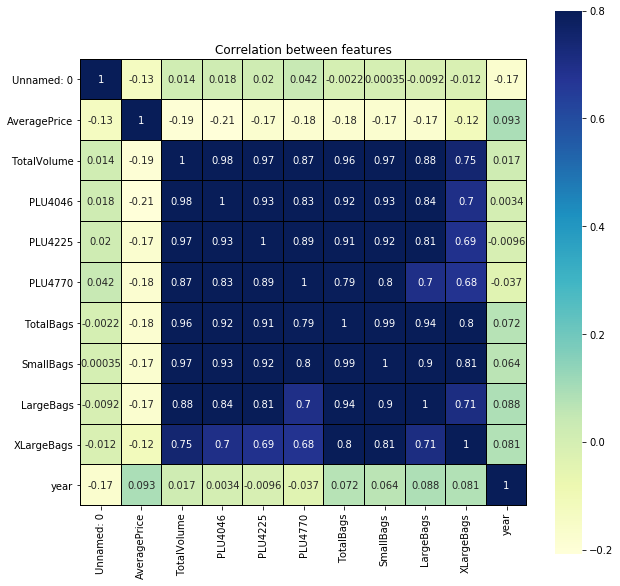

In [8]:
corr = avocado.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [9]:
print('Type - ', avocado.type.unique())
print('region - ', avocado.region.unique())

Type -  ['conventional' 'organic']
region -  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [ ]:
#avocado.type.replace(('conventional', 'organic'), (0, 1,), inplace = True)
#avocado.region.replace(('Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California',
                        'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit',
                        'GrandRapids' ,'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis',
                        'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville',
                        'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
                        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
                        'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast',
                        'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'),
                       (0, 1,), inplace = True)

In [4]:
avocado.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
TotalVolume      9.007687
PLU4046          8.648220
PLU4225          8.942466
PLU4770         10.159396
TotalBags        9.756072
SmallBags        9.540660
LargeBags        9.796455
XLargeBags      13.139751
year             0.215339
dtype: float64

In [12]:
avocado = pd.get_dummies(avocado, columns=['region'], drop_first=True)


In [13]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PLU4046',
       'PLU4225', 'PLU4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
 

In [74]:
avocado = avocado.drop(['Unnamed: 0','Date'], axis = 1)
avocado.head()


,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
X = avocado.loc[:,avocado.columns != 'type']
X.head()

,AveragePrice,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = avocado.type  
y.head()

0    conventional
1    conventional
2    conventional
3    conventional
4    conventional
Name: type, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 63)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 63)
y_test shape:  (3650,)


# Logestic regression predicting 'type'

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Model evaluation

In [59]:
y_pred_train = logreg.predict(X_train)  

In [60]:
y_pred_test = logreg.predict(X_test)  

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9241095890410959


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

      0     1
0  1610   238
1    39  1763


That means 39 + 238 = 277 false and 1610 + 1763 = 3373 correct predictions using Logestic Regression algorithm.

# Decission tree predicting 'type'

In [64]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [65]:
y_pred_train = model.predict(X_train)  

In [66]:
y_pred_test = model.predict(X_test)

# Model evaluation

In [68]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9956164383561644


In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                1836                  12
Actual Survived               4                1798


That means 12 + 4 = 16 false and 1836 + 1798 = 3634 correct predictions using Decission Tree algorithm.

# Random forest predicting 'type'

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
y_pred_train = model.predict(X_train)

In [73]:
y_pred_test = model.predict(X_test) 

In [74]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using the model without parameter specification: 0.9983561643835617


In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

      0     1
0  1843     5
1     1  1801


This means 1843 + 1801 = 3644 correct predictions & 5 + 1 = 6 false predictions using Random Forest algorithm.

# Linear Regression predicting 'AveragePrice'

In [68]:
avocado_LinR.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PLU4046',
       'PLU4225', 'PLU4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region'],
      dtype='object')

In [1]:
avocado_LinR.skew()

NameError: name 'avocado_LinR' is not defined

In [80]:
avocado_LinR = avocado_LinR.drop(['Unnamed: 0','Date'], axis = 1)
avocado_LinR.columns

Index(['AveragePrice', 'TotalVolume', 'PLU4046', 'PLU4225', 'PLU4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

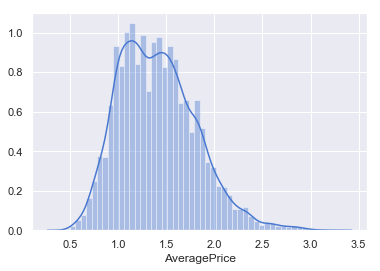

In [66]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(avocado_LinR["AveragePrice"].dropna());

In [82]:
X_LinR = avocado_LinR.loc[:,avocado_LinR.columns != 'AveragePrice']

X_LinR.head()

,TotalVolume,PLU4046,PLU4225,PLU4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [83]:
y_LinR = avocado_LinR.AveragePrice  
y_LinR.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [84]:
X_LinR = pd.get_dummies(X_LinR, columns=['type'], drop_first=True)
X_LinR = pd.get_dummies(X_LinR, columns=['region'], drop_first=True)


In [85]:
X_LinR.columns

Index(['TotalVolume', 'PLU4046', 'PLU4225', 'PLU4770', 'TotalBags',
       'SmallBags', 'LargeBags', 'XLargeBags', 'year', 'type_organic',
       'region_Atlanta', 'region_BaltimoreWashington', 'region_Boise',
       'region_Boston', 'region_BuffaloRochester', 'region_California',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork', 'region_Northeast',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Plains',
       'region

In [86]:
from sklearn.model_selection import train_test_split

X_LinR_train, X_LinR_test, y_LinR_train, y_LinR_test=train_test_split(X_LinR, y_LinR, test_size=0.20, random_state=1)

print('Train cases as below')
print('X_LinR_train shape: ',X_LinR_train.shape)
print('y_LinR_train shape: ',y_LinR_train.shape)
print('\nTest cases as below')
print('X_LinR_test shape: ',X_LinR_test.shape)
print('y_LinR_test shape: ',y_LinR_test.shape)

Train cases as below
X_LinR_train shape:  (14599, 63)
y_LinR_train shape:  (14599,)

Test cases as below
X_LinR_test shape:  (3650, 63)
y_LinR_test shape:  (3650,)


In [88]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_LinR_train, y_LinR_train) 

y_pred_test_linR = linreg.predict(X_LinR_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(y_LinR_test, y_pred_test_linR))

In [90]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_LinR_test, y_pred_test_linR))
print(RMSE_test)

0.26498610492153757


In [91]:
yhat = linreg.predict(X_LinR_train)
SS_Residual = sum((y_LinR_train-yhat)**2)
SS_Total = sum((y_LinR_train-np.mean(y_LinR_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_LinR_train)-1)/(len(y_LinR_train)-X_LinR_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5551459309622133 0.5532177709106564


In [92]:
y_pred_test = linreg.predict(X_LinR_test)

In [95]:
y_pred_train = linreg.predict(X_LinR_train)  

In [97]:
MAE_train = metrics.mean_absolute_error(y_LinR_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_LinR_test, y_pred_test)

In [98]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.20112469226261026
MAE for test set is 0.19960875675726328
